In [2]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

In [3]:
# Load the model
model = load_model('Model/cat_dog.h5', compile=False)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-18 11:41:02.132715: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-18 11:41:02.133537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [5]:
# Load the labels
class_names = open('Model/catdoglabel.txt', 'r').readlines()
class_names

['Cat\n', 'Dog']

In [6]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 150, 150, 3), dtype=np.float32)

In [7]:
# Replace this with the path to your image
image = Image.open('Dataset/kagglecatsanddogs_5340/PetImages/Cat/10.jpg').convert('RGB')


Image before processing : AxesImage(80,52.8;496x369.6)


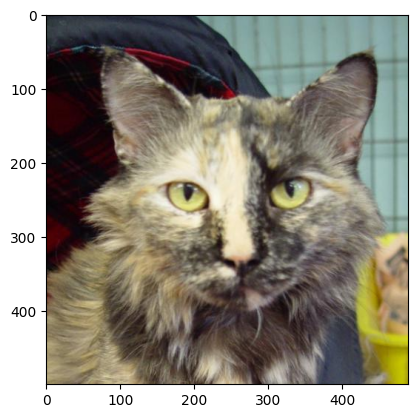

In [8]:
print('Image before processing :', plt.imshow(image))

In [9]:
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (150, 150)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
# image = tf.image.resize(image, size)

#turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
#normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
normalized_image_array = (image_array.astype(np.float32) / 255)

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

/var/folders/fd/1mv0d7g16sx55cwb0hmjv94c0000gn/T/ipykernel_86069/232205604.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
2022-11-18 11:41:03.285780: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 265ms/step


2022-11-18 11:41:03.365254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Class                  : Cat
Confidence Score (0-1) : 3.2711469e-06


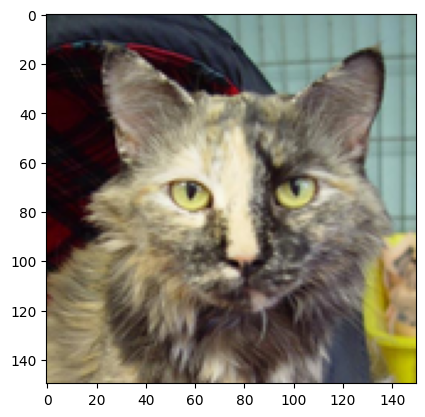

In [10]:
print('Class                  :', class_name, end='')
print('Confidence Score (0-1) :', confidence_score)
plt.imshow(image)